基于规则的推荐是通过聚类方法来对用户和物品分类，利用`同类用户`对`同类物品`的评分均值来预测用户对物品的评分。

`用户分类-物品均值`

基于用户对物品评分均值来分类。

1.根据对train物品评分来分类用户。

2.由于对用户进行分类，那么对用一种物品，在不同簇下的得分就不同。

3.根据[物品, 簇]确定用户-物品的得分。

参考：https://blog.csdn.net/zk_j1994/article/details/77855959

# 加载数据集

In [18]:
import pandas as pd
import numpy as np

In [19]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [20]:
#columns_names = ['用户id', '商品id', '评分', '相对时间']
train.head()

,uid,iid,score,time
0,0,0,2,19
1,0,8,4,273
2,0,13,1,587
3,0,18,3,15
4,0,34,3,17


In [21]:
test.head()

,uid,iid
0,0,12960
1,1,12726
2,1,11463
3,1,10739
4,1,3441


### 1.获取每个用户的平均评分

In [22]:
rate_rank = train.groupby('uid').mean().loc[:,['score']].iloc[:, -1]
rate_rank_df = pd.DataFrame(np.int32((rate_rank*2).values), index=rate_rank.index, columns=['mean_score'])
rate_rank_df = rate_rank_df.reset_index()

In [23]:
rate_rank_df.head()

,uid,mean_score
0,0,5
1,1,6
2,2,7
3,3,6
4,4,6


In [24]:
train_all = pd.merge(train, rate_rank_df, how='left', on='uid')
test_all = pd.merge(test, rate_rank_df, how='left', on='uid')

In [25]:
train_all.head()

,uid,iid,score,time,mean_score
0,0,0,2,19,5
1,0,8,4,273,5
2,0,13,1,587,5
3,0,18,3,15,5
4,0,34,3,17,5


In [26]:
test_all.head()

,uid,iid,mean_score
0,0,12960,5
1,1,12726,6
2,1,11463,6
3,1,10739,6
4,1,3441,6


### 2.由于对用户进行分类，那么对用一种物品，在不同簇下的得分就不同。

In [27]:
res = train_all.groupby(['iid', 'mean_score']).mean().reset_index().loc[:,['iid','mean_score','score']]

In [28]:
res.head()

,iid,mean_score,score
0,0,2,1.000000
1,0,4,2.600000
2,0,5,2.586207
3,0,6,3.090909
4,0,7,3.716418


### 3.根据[物品, 簇]确定用户-物品的得分。

In [29]:
result = pd.merge(test_all, res, how='left', on=['iid', 'mean_score']).fillna(3.0)

In [30]:
result.head()

,uid,iid,mean_score,score
0,0,12960,5,3.696970
1,1,12726,6,3.502203
2,1,11463,6,2.906910
3,1,10739,6,3.295213
4,1,3441,6,3.201120


In [86]:
result[['score']].to_csv('../outputs/cluster.csv', index=False)

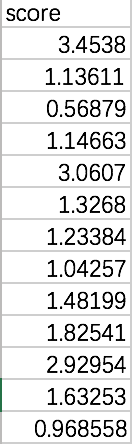